## Import Packages

In [ ]:
import pandas            as pd
import numpy             as np
import seaborn           as sb
import scipy.stats       as sp
import matplotlib.pyplot as plt

In [ ]:
# Acess to google drive
from google.colab import drive
drive.mount('/content/drive')

.

.

.



## Load Feature Dataset (1 file)

In [ ]:
FeatureData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SavedFiles/FeatureData.csv',header=None)
FeatureData

### Declare normal & abnormal features seperately

In [ ]:
NoOfData = int(FeatureData.shape[1]/2)  # int function: convert float to integer
Normal_FeatureData   = FeatureData.iloc[:,:NoOfData]
Abnormal_FeatureData = FeatureData.iloc[:,NoOfData:]

print(Normal_FeatureData.shape)
print(Abnormal_FeatureData.shape)

.

.

.



## P-value calculation (t-Test)

P-value (0 ~ 1) is the representative indicator of statistical difference between two or more groups.

- low p-value (< 0.05) represents that those groups are well distinguished.
- Watch the following YouTube video to better understand about p-value.

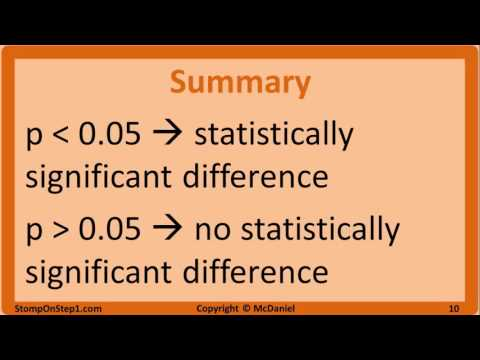

In [23]:
from IPython.display import YouTubeVideo
YouTubeVideo('YSwmpAmLV2s')

In [ ]:
NoOfFeature = FeatureData.shape[0] # Number of feature: 270

P_value = np.zeros((NoOfFeature , 2))

# t-Test (Result: p-value)
for i in np.arange(NoOfFeature):

    T_test       = np.array(sp.ttest_ind(Normal_FeatureData.iloc[i,:] , Abnormal_FeatureData.iloc[i,:]))
    P_value[i,0] = i          # Index of feature (0~269)
    P_value[i,1] = T_test[1]  # P-value

P_value = pd.DataFrame(P_value, columns=['No.', 'P-value'])
P_value

In [ ]:
# Sort by P-value in ascending order
P_value_Rank = P_value.sort_values(['P-value'], ascending=True)
P_value_Rank

In [ ]:
# Save t-Test result (p-value)
path1 = '/content/drive/MyDrive/Colab Notebooks/SavedFiles/P_value.csv'
path2 = '/content/drive/MyDrive/Colab Notebooks/SavedFiles/P_value_Rank.csv'
P_value.to_csv(path1, sep=',', header=None, index=None)
P_value_Rank.to_csv(path2, sep=',', header=None, index=None)

.

.

.



## Confirm PDF(Probabilistic Density Function) Graphs (Normal vs Abnormal)

In [ ]:
# P-value Rank (0 ~ 269)
FeatureRank = 1

# PDF Chart
plt.figure(figsize=(10,5))
sb.histplot(Normal_FeatureData.iloc[int(P_value_Rank.iloc[FeatureRank,0])  ,:], kde=True, label = 'Normal')
sb.histplot(Abnormal_FeatureData.iloc[int(P_value_Rank.iloc[FeatureRank,0]),:], kde=True, label = 'Abnormal')
plt.legend(loc='best', fontsize=10)
plt.xlabel(f'Feature Rank: {FeatureRank+1}')
plt.grid(alpha=0.3)
plt.show()

## Select Top Features Having Low P-values

In [ ]:
Rank = 30  # Select number of rank

Normal   = np.zeros((Rank,NoOfData))
Abnormal = np.zeros((Rank,NoOfData))

for i in range(Rank):

    index         = int(P_value_Rank.iloc[i,0])
    Normal[i,:]   = Normal_FeatureData.iloc[index,:].values
    Abnormal[i,:] = Abnormal_FeatureData.iloc[index,:].values

FeatureSelected = pd.DataFrame(np.concatenate([Normal, Abnormal] , axis=1))

print("Selected Feature Data Size :", FeatureSelected.shape)

## Save Finally Selected Feature Data in Drive (.csv)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/SavedFiles/FeatureSelected.csv'
FeatureSelected.to_csv(path, sep=',', header=None, index=None)